<a href="https://colab.research.google.com/github/fellowship/platform-demos3/blob/master/Burn/models/burn_cutmix_300epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import time
import os
import sys
import importlib.util
from pathlib import Path
from google.colab import drive

import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.vision.models import *


import numpy as np
import matplotlib.pyplot as plt


print("Fastai Version: ",fastai.__version__)

Fastai Version:  1.0.54


In [7]:
# Top level data directory. 

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
sys.path.append('/content/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
path = Path('/content/drive/My Drive/burn/burn_nosplit_final/')
path.ls()

[PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/1'),
 PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/2'),
 PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/3'),
 PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/none'),
 PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/models'),
 PosixPath('/content/drive/My Drive/burn/burn_nosplit_final/burn_model_TL_imagenet.pth')]

In [9]:
import time 
start = time.time()
print(start)

1562381297.6769037


## Training and Predictions : ResNet34


In [0]:
tfms = get_transforms(flip_vert=True)
np.random.seed(0)
data1 = ImageDataBunch.from_folder(path, valid_pct=0.3, ds_tfms=tfms, size=224).normalize(imagenet_stats) 

Classes:  ['1', '2', '3', 'none']


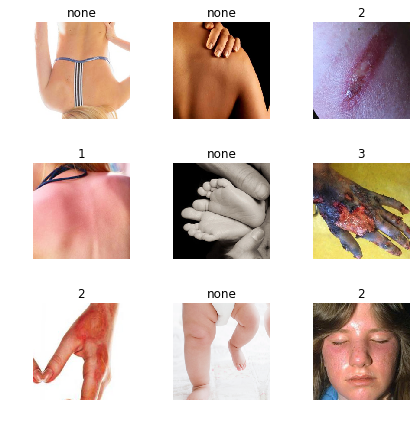

In [11]:
data1.show_batch(rows=3, figsize=(6, 6))
print('Classes: ',data1.classes)

In [8]:
learn_1 = cnn_learner(data1, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 124434357.58it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


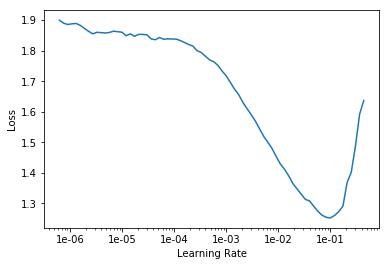

In [9]:
learn_1.lr_find()
learn_1.recorder.plot()

In [10]:
learn_1.fit_one_cycle(300, 1e-2, pct_start=0.5, callbacks=[SaveModelCallback(learn_1, every='improvement', monitor='accuracy', name='best_1a')])

epoch,train_loss,valid_loss,accuracy,time
0,1.662709,1.197956,0.463964,01:36
1,1.415642,0.933718,0.644144,00:11
2,1.260245,0.814921,0.657658,00:11
3,1.133577,0.763084,0.684685,00:10
4,1.047762,0.725155,0.716216,00:11
5,0.996537,0.694455,0.729730,00:11
6,0.942184,0.666697,0.756757,00:10
7,0.872355,0.651873,0.756757,00:11
8,0.826670,0.635344,0.752252,00:11
9,0.794089,0.616824,0.779279,00:10


Better model found at epoch 0 with accuracy value: 0.46396395564079285.
Better model found at epoch 1 with accuracy value: 0.6441441178321838.
Better model found at epoch 2 with accuracy value: 0.6576576828956604.
Better model found at epoch 3 with accuracy value: 0.684684693813324.
Better model found at epoch 4 with accuracy value: 0.7162162065505981.
Better model found at epoch 5 with accuracy value: 0.7297297120094299.
Better model found at epoch 6 with accuracy value: 0.7567567825317383.
Better model found at epoch 9 with accuracy value: 0.7792792916297913.
Better model found at epoch 10 with accuracy value: 0.792792797088623.
Better model found at epoch 51 with accuracy value: 0.815315306186676.


In [11]:
a = accuracy(*learn_1.get_preds())
print(a)

tensor(0.8153)


In [0]:
learn_1.save('burn_nosplit_final_defaultm')

In [0]:
# learn_1.unfreeze()

In [0]:
# learn_1.fit_one_cycle(5, slice(1e-3, 5e-2), pct_start=0.5, callbacks=[SaveModelCallback(learn_1, every='improvement', monitor='accuracy', name='best_1a')])

In [0]:
# a_unf = accuracy(*learn_1.get_preds())
# print(a_unf)

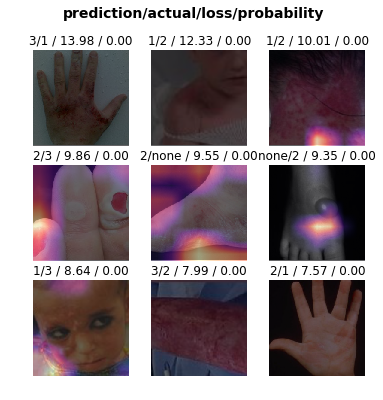

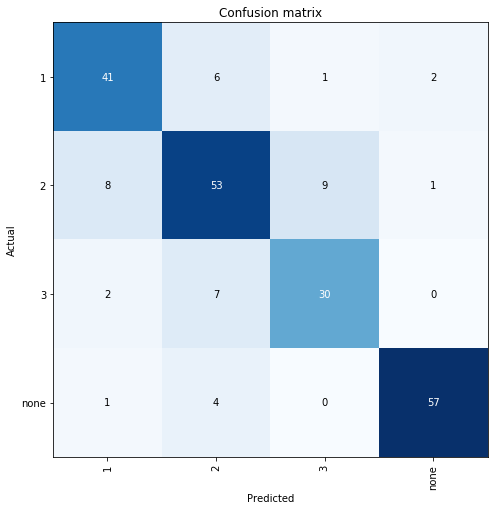

In [16]:
# Top Losses

interp = ClassificationInterpretation.from_learner(learn_1)
losses, idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(6, 6))
interp.plot_confusion_matrix(figsize=(7, 7))

## Training and Predictions : ResNet34 with mixup


In [0]:
learn_2 = cnn_learner(data1, models.resnet34, metrics=accuracy).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


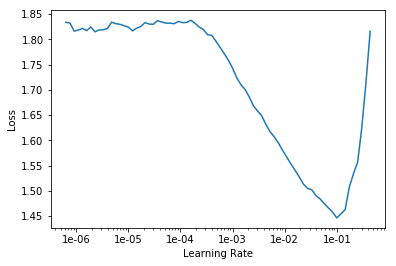

In [15]:
learn_2.lr_find()
learn_2.recorder.plot()

In [16]:
learn_2.fit_one_cycle(300, 1e-2, pct_start=0.5, callbacks=[SaveModelCallback(learn_2, every='improvement', monitor='accuracy', name='best_2b')])

epoch,train_loss,valid_loss,accuracy,time
0,1.664620,1.239847,0.432432,00:11
1,1.500469,0.950146,0.603604,00:11
2,1.374768,0.814438,0.671171,00:11
3,1.299904,0.756948,0.702703,00:11
4,1.229314,0.731716,0.707207,00:11
5,1.191264,0.711895,0.729730,00:11
6,1.154331,0.702444,0.729730,00:11
7,1.121466,0.696501,0.725225,00:11
8,1.099339,0.672488,0.729730,00:11
9,1.080683,0.660164,0.734234,00:11


Better model found at epoch 0 with accuracy value: 0.4324324429035187.
Better model found at epoch 1 with accuracy value: 0.6036036014556885.
Better model found at epoch 2 with accuracy value: 0.6711711883544922.
Better model found at epoch 3 with accuracy value: 0.7027027010917664.
Better model found at epoch 4 with accuracy value: 0.707207202911377.
Better model found at epoch 5 with accuracy value: 0.7297297120094299.
Better model found at epoch 9 with accuracy value: 0.7342342138290405.
Better model found at epoch 10 with accuracy value: 0.7387387156486511.
Better model found at epoch 11 with accuracy value: 0.7612612843513489.
Better model found at epoch 16 with accuracy value: 0.7657657861709595.
Better model found at epoch 20 with accuracy value: 0.7747747898101807.
Better model found at epoch 22 with accuracy value: 0.7837837934494019.
Better model found at epoch 33 with accuracy value: 0.792792797088623.
Better model found at epoch 66 with accuracy value: 0.7972972989082336.
B

In [17]:
b = accuracy(*learn_2.get_preds())
print(b)

tensor(0.8288)


In [0]:
learn_2.save('burn_nosplit_final_mixup')

In [0]:
# learn_2.unfreeze()

In [0]:
# learn_2.fit_one_cycle(5, slice(1e-3, 5e-2), pct_start=0.5, callbacks=[SaveModelCallback(learn_2, every='improvement', monitor='accuracy', name='best_2b')])

In [0]:
# b_unf = accuracy(*learn_2.get_preds())
# print(b_unf)

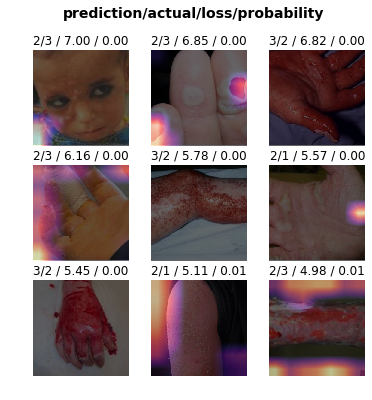

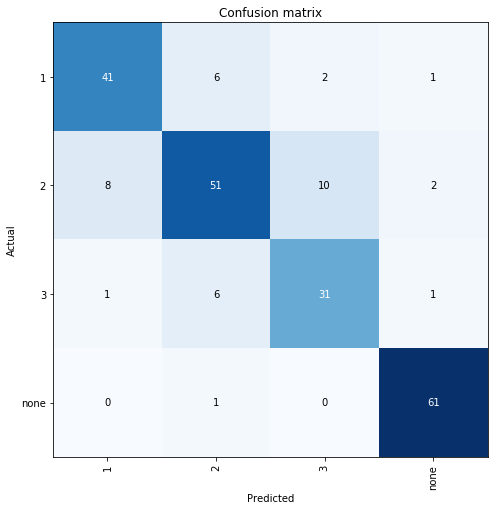

In [22]:
# Top Losses

interp = ClassificationInterpretation.from_learner(learn_2)
losses, idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(6, 6))
interp.plot_confusion_matrix(figsize=(7, 7))

## Training and Predictions : ResNet34 with cutmix


In [0]:
# CutMix 

from fastai.torch_core import *
from fastai.callbacks.mixup import MixUpLoss
from fastai.basic_train import Learner, LearnerCallback

class CutMixCallback(LearnerCallback):
    "Callback that creates the cutmixed input and target."
    def __init__(self, learn:Learner, α:float=1., stack_y:bool=True, true_λ:bool=True):
        super().__init__(learn)
        self.α,self.stack_y,self.true_λ = α,stack_y,true_λ

    def on_train_begin(self, **kwargs):
        if self.stack_y: self.learn.loss_func = MixUpLoss(self.learn.loss_func)

    def on_batch_begin(self, last_input, last_target, train, **kwargs):
        "Applies cutmix to `last_input` and `last_target` if `train`."
        if not train: return
        λ = np.random.beta(self.α, self.α)
        λ = max(λ, 1- λ)
        shuffle = torch.randperm(last_target.size(0)).to(last_input.device)
        x1, y1 = last_input[shuffle], last_target[shuffle]
        #Get new input
        last_input_size = last_input.shape
        bbx1, bby1, bbx2, bby2 = rand_bbox(last_input.size(), λ)
        new_input = last_input.clone()
        new_input[:, ..., bby1:bby2, bbx1:bbx2] = last_input[shuffle, ..., bby1:bby2, bbx1:bbx2]
        λ = last_input.new([λ])
        if self.true_λ:
            λ = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (last_input_size[-1] * last_input_size[-2]))
            λ = last_input.new([λ])
        if self.stack_y:
            new_target = torch.cat([last_target.unsqueeze(1).float(), y1.unsqueeze(1).float(),
                                    λ.repeat(last_input_size[0]).unsqueeze(1).float()], 1)
        else:
            if len(last_target.shape) == 2:
                λ = λ.unsqueeze(1).float()
            new_target = last_target.float() * λ + y1.float() * (1-λ)
        return {'last_input': new_input, 'last_target': new_target}

    def on_train_end(self, **kwargs):
        if self.stack_y: self.learn.loss_func = self.learn.loss_func.get_old()


def rand_bbox(last_input_size, λ):
    '''lambd is always between .5 and 1'''

    W = last_input_size[-1]
    H = last_input_size[-2]
    cut_rat = np.sqrt(1. - λ) # 0. - .707
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2


def cutmix(learn:Learner, α:float=1., stack_x:bool=False, stack_y:bool=True, true_λ:bool=True) -> Learner:
    "Add mixup https://arxiv.org/pdf/1905.04899.pdf to `learn`."
    learn.callback_fns.append(partial(CutMixCallback, α=α, stack_y=stack_y, true_λ=true_λ))
    return learn

Learner.cutmix = cutmix

In [0]:
learn_3 = cnn_learner(data1, models.resnet34, metrics=accuracy).cutmix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


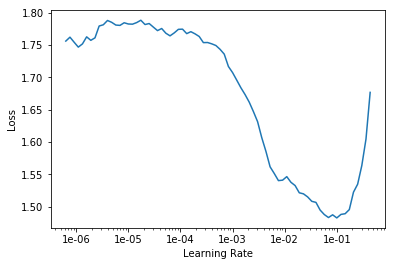

In [25]:
learn_3.lr_find()
learn_3.recorder.plot()

In [26]:
learn_3.fit_one_cycle(300, 1e-2, pct_start=0.5, callbacks=[SaveModelCallback(learn_3, every='improvement', monitor='accuracy', name='best_3c')])

epoch,train_loss,valid_loss,accuracy,time
0,1.592312,1.218965,0.477477,00:10
1,1.479977,1.009087,0.576577,00:10
2,1.410087,0.873834,0.635135,00:10
3,1.362893,0.798507,0.657658,00:11
4,1.304836,0.755727,0.680180,00:11
5,1.258408,0.733236,0.693694,00:11
6,1.231897,0.717938,0.693694,00:11
7,1.217906,0.710384,0.711712,00:10
8,1.176475,0.702717,0.716216,00:11
9,1.153462,0.689916,0.725225,00:11


Better model found at epoch 0 with accuracy value: 0.477477490901947.
Better model found at epoch 1 with accuracy value: 0.5765765905380249.
Better model found at epoch 2 with accuracy value: 0.6351351141929626.
Better model found at epoch 3 with accuracy value: 0.6576576828956604.
Better model found at epoch 4 with accuracy value: 0.6801801919937134.
Better model found at epoch 5 with accuracy value: 0.6936936974525452.
Better model found at epoch 7 with accuracy value: 0.7117117047309875.
Better model found at epoch 8 with accuracy value: 0.7162162065505981.
Better model found at epoch 9 with accuracy value: 0.7252252101898193.
Better model found at epoch 19 with accuracy value: 0.7297297120094299.
Better model found at epoch 23 with accuracy value: 0.7342342138290405.
Better model found at epoch 28 with accuracy value: 0.7432432174682617.
Better model found at epoch 30 with accuracy value: 0.7657657861709595.
Better model found at epoch 45 with accuracy value: 0.7792792916297913.
Be

In [27]:
c = accuracy(*learn_3.get_preds())
print(c)

tensor(0.8108)


In [0]:
learn_3.save('burn_nosplit_final_mixup')

In [0]:
# learn_3.unfreeze()

In [0]:
# learn_3.fit_one_cycle(5, slice(1e-3, 5e-2), pct_start=0.5, callbacks=[SaveModelCallback(learn_3, every='improvement', monitor='accuracy', name='best_3c')])

In [0]:
# c_unf = accuracy(*learn_3.get_preds())
# print(c_unf)

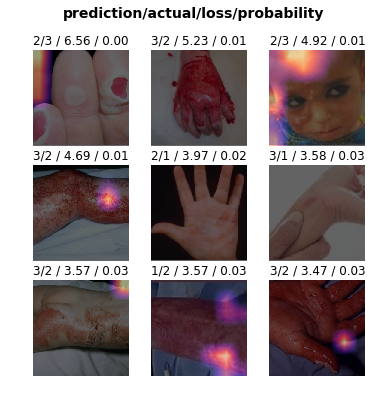

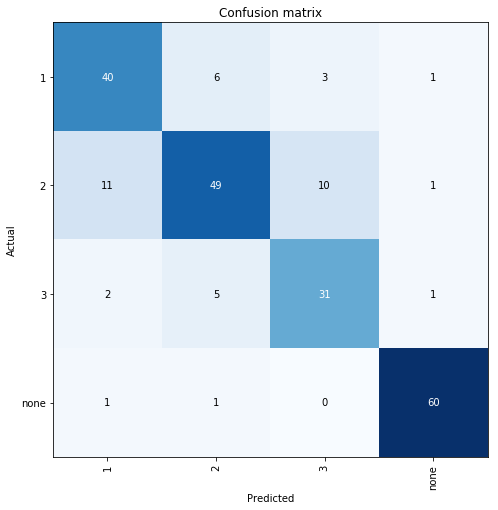

In [32]:
# Top Losses

interp = ClassificationInterpretation.from_learner(learn_3)
losses, idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(6, 6))
interp.plot_confusion_matrix(figsize=(7, 7))

In [33]:
print((time.time()-start)/60)

162.31244597434997


In [0]:
print(a, b, c ) #accuracies

* with 5 epochs  ~ 10 min: tensor(0.6937) tensor(0.6486) tensor(0.6892)  i.e.  default > cutmix > mixup



* with 30 epochs  ~ 42 min : tensor(0.7838) tensor(0.8063) tensor(0.8063) i.e. default < mixup = cutmix



* with 60 epochs  ~ 51 min : tensor(0.8198) tensor(0.8153) tensor(0.8108) i.e default > mixup > cutmix


Note: In the original paper [cutmix](https://github.com/clovaai/CutMix-PyTorch), number of epochs = 300.

* with 300 epochs  ~ 162 min : tensor(0.8153) tensor(0.8288) tensor(0.8108) i.e  mixup > default  > cutmix
